# Исследование рынка видеоигр

**Описание проекта**

Существует интернет-магазин компьютерных игр, который продаёт их по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Наша задача - спланировать компанию на 2017 год, на какие игры делать ставку по продажам.

Основные цели исследования:

- Выявить наиболее актуальный для исследования временной промежуток и платформы.
- Изучить популярность различных жанров, продажи, влияние оценок в разрезе по регионам.
- Проверить гипотезы о равенстве оценок пользователей на Xbox One и ПК и о равенстве оценок пользователей в жанрах Action и Sports.
- Дать рекомендации

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Обработка-названий" data-toc-modified-id="Обработка-названий-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обработка названий</a></span></li><li><span><a href="#Отработка-пропусков-и-дубликатов" data-toc-modified-id="Отработка-пропусков-и-дубликатов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Отработка пропусков и дубликатов</a></span></li><li><span><a href="#Добавление-столбца-суммарных-продаж" data-toc-modified-id="Добавление-столбца-суммарных-продаж-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Добавление столбца суммарных продаж</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Оценка-продаж-по-годам-и-платформам" data-toc-modified-id="Оценка-продаж-по-годам-и-платформам-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Оценка продаж по годам и платформам</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Ислледование-актуального-периода-и-платформ" data-toc-modified-id="Ислледование-актуального-периода-и-платформ-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ислледование актуального периода и платформ</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Ислледование-жанров" data-toc-modified-id="Ислледование-жанров-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Ислледование жанров</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-пользователей-по-регионам" data-toc-modified-id="Исследование-пользователей-по-регионам-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Исследование пользователей по регионам</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Предобработка данных

### Знакомство с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv(r'C:\Users\danfe\Practicum projects\datasets\games.csv')
display(data)
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего в датасете 16715 строк, что соответствует числу игр. Данные нуждаются в серьезной предобработке, имеется достаточно большое количество пропусков,  названия столбцов стилистически неверны, типы данных нуждаются в преобразовании. Также было бы неплохо добавить суммарные продажи по всем регионам в отдельный столбец.

### Обработка названий

Начнем с преобразования названий

In [3]:
data.columns = data.columns.str.lower()

### Отработка пропусков и дубликатов

Теперь отработаем пропуски и возможные дубликаты. Пропуски в столбце *name* и *year_of_release* являются критичными и, так как таких пропусков немного, предлагаю избавиться от этих строк. 

In [4]:
data = data.loc[data['name'].isna() == False]
data = data.loc[data['year_of_release'].isna() == False]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Отлично, у нас остались пропуски только в оценках и возрастном рейтинге. Заполнять их сейчас будет некорректно, так как заполнение характерными величинами (медианной или средним) приведет к искажению данных (скорее всего рейтинг не определен у непопулярных игр с низкими продажами, поэтому заполнение этих строк приведет к искажению ситуации).

Перейдем к изменению типов. Необходимо заменить год выпуска на целочисленный тип и user_score на число с плавающий запятой.

In [5]:
display(data['year_of_release'])
display(data['user_score'])

data['year_of_release'] = data['year_of_release'].astype('int64')
data['user_score'] = data['user_score'].astype('float64', errors='ignore')

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16444, dtype: float64

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16444, dtype: object

Тип обьекта в user_score остался прежним. Это произошло потому, что в нем содержится строковое значение tbd - to be determined, что означает будет определено. Это значит, что на момент сбора данных, оценки игроков еще не были получены, поэтому их мы не будем использовать в нашем анализе. Заменим значение tbd на NaN, так как полезной информации данное значение не несет, но мешает исправить тип данных.

In [6]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = 'NaN'
data['user_score'] = data['user_score'].astype('float64')

In [7]:
data['rating'] = data['rating'].fillna('Not NA')

display(data)
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Not NA
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Not NA
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Not NA
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Not NA
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Not NA
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Not NA


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Теперь проверим данные на явные дубликаты

In [8]:
data.duplicated().sum()

0

Явных дубликатов нет, это отлично. Проверку на дубликаты по названию можно проверить функцией value_counts

In [9]:
data['name'].value_counts()

Need for Speed: Most Wanted                          12
FIFA 14                                               9
LEGO Marvel Super Heroes                              9
Ratatouille                                           9
Terraria                                              8
                                                     ..
SD Gundam: Scad Hammers                               1
Dynasty Warriors 7: Xtreme Legends                    1
Lovely Lisa                                           1
Taiko no Tatsujin DS: Dororon! Youkai Daikessen!!     1
Love Live! School Idol Paradise                       1
Name: name, Length: 11426, dtype: int64

А вот теперь дубликаты были найдены. Причем их количество достаточно велико. Возможно причина дубликатов в том, что выходило несколько игр с одинаковым названием в разные года, но судя по моим знаниям, я помню только 2 итерации nfs: most wanted, поэтому тут мы имеем дело с дубликатами.

Для начала выведем табличку с nfs для примера того, что творится в данных

In [10]:
data.loc[data['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,Not NA
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,Not NA
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,Not NA
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Можно выдохнуть, тут имеет дело записи о разных платформах, на которых выходила игра. На этом обработку пропусков и дубликатов можно завершить

### Добавление столбца суммарных продаж

Перейдем к последнему пункту - добавлению суммарных продаж

In [11]:
data['total_sales'] = (data['na_sales'] + 
                       data['eu_sales'] + 
                       data['jp_sales'] + 
                       data['other_sales'])

data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Not NA,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Not NA,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Not NA,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Not NA,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Not NA,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Not NA,0.01


Мы получили новый столбец с суммой продаж в миллионах копий.

### Вывод

Была выполнена предобработка данных: исправлены названия столбцов, обработаны пропуски, выполнена проверка на дубликаты. Был добавлен новый столбец с общим количеством продаж. По результатам данных оперций мы получили 16444 строки, что составляет 98.4% от изначальных данных.

## Исследовательский анализ данных

### Оценка продаж по годам и платформам

Перейдем к предварительному анализу наших данных. Посмотрим, сколько игр выпускалось по годам, как менялись продажи по различным платформам.

Начнем с количества игр по годам

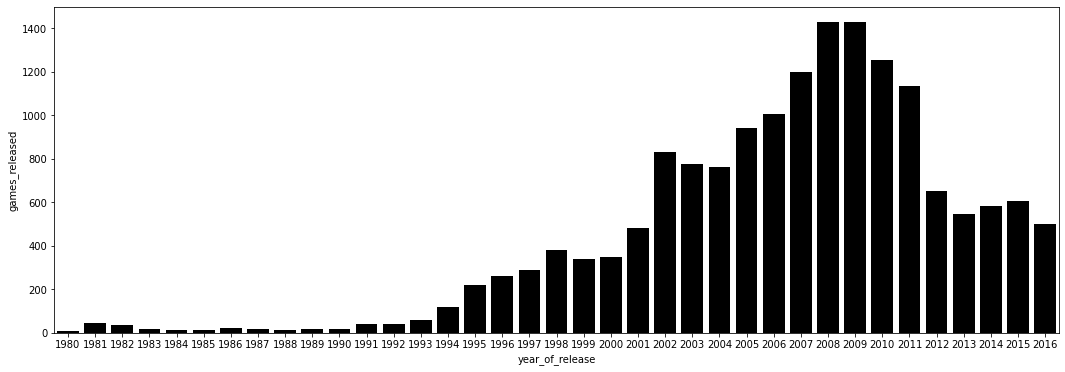

In [12]:
data_years = data.groupby(by='year_of_release').agg({'name':'count'})

plt.figure(figsize=(18,6))
sns.barplot(data=data_years, x=data_years.index, y='name', color='black')
plt.ylabel('games_released')
plt.show()

Как мы видим, период до приблизительно 95 года не играет особой ценности в виду малого количества выпущенных игр. Так как мы планируем рекламную компанию на 2017 год, наибольший интерес для нас будут составлять несколько лет до 17 года, а также период с 2007 по 2011 в виду наибольшего числа выпущенных игр.

Теперь посмотрим на продажи в зависимости от платформы.

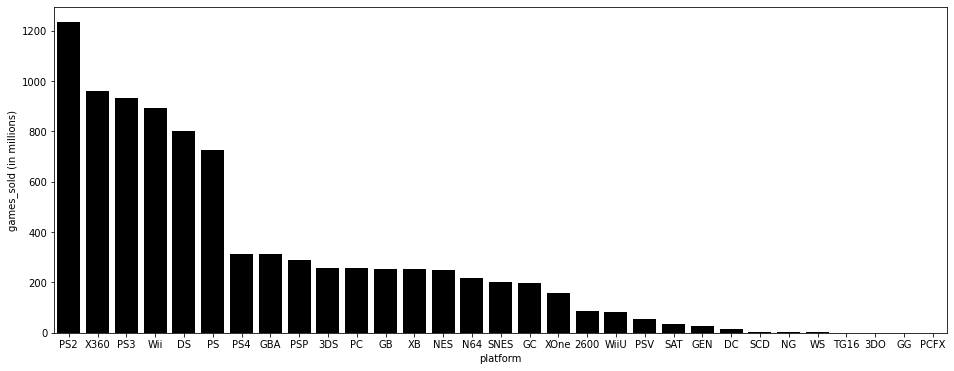

In [13]:
data_platforms = data.groupby(by='platform').agg({'total_sales':'sum'})
data_platforms = data_platforms.sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(16,6))
sns.barplot(data=data_platforms, x=data_platforms.index, y='total_sales', color='black')
plt.ylabel('games_sold (in millions)')
plt.show()

Как мы видим, лидирует PlayStation 2, пятерка явных лидеров за ней - XBOX 360, PlayStation 3, Nintendo Wii, Nintendo DS и первая PlayStation. Все эти платформы - платформы предыдущих поколений, поэтому мы можем по распределению продаж посмотреть, сколько лет составляет в среднем жизненный цикл платформы.

Для примера возьмем 6ку наших лидеров и платформу исключение - ПК, и посмотрим на распределение их продаж по годам

Данные для платформы PS2


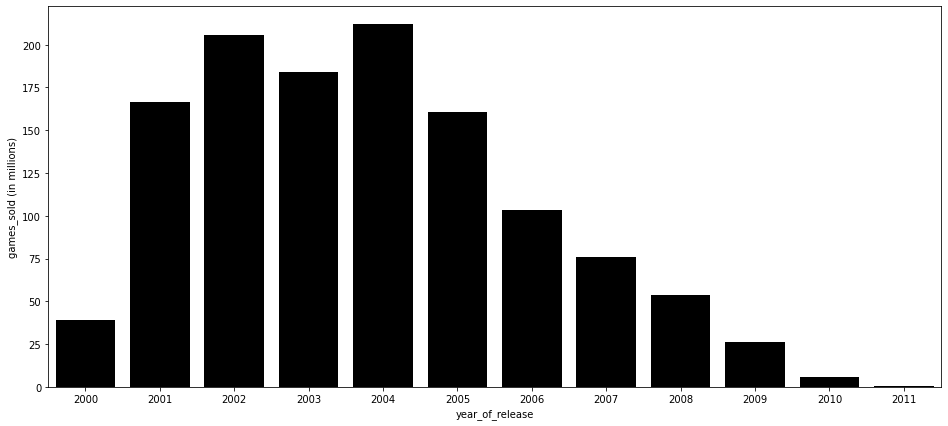

Данные для платформы X360


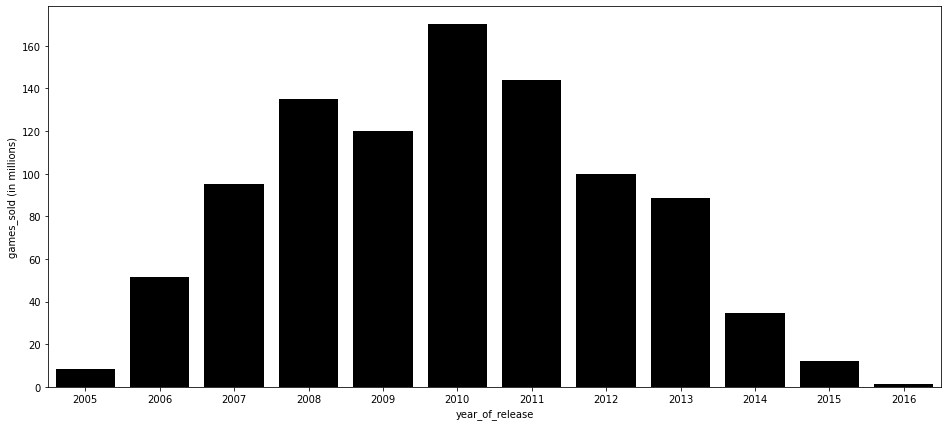

Данные для платформы PS3


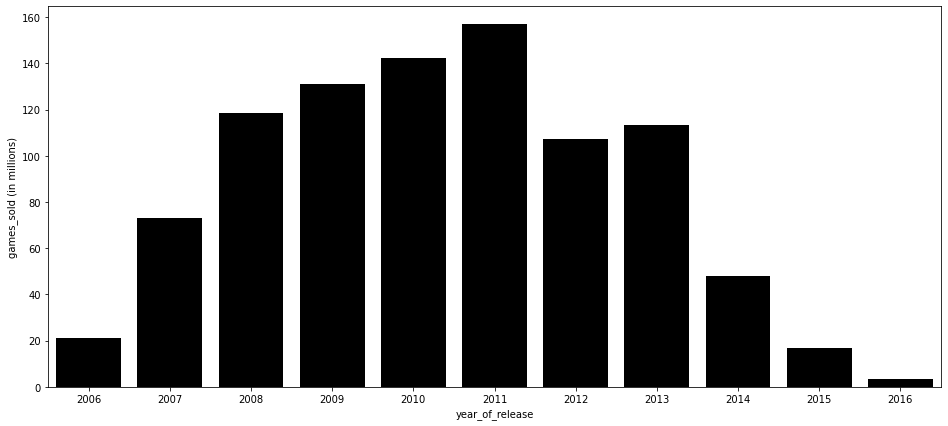

Данные для платформы Wii


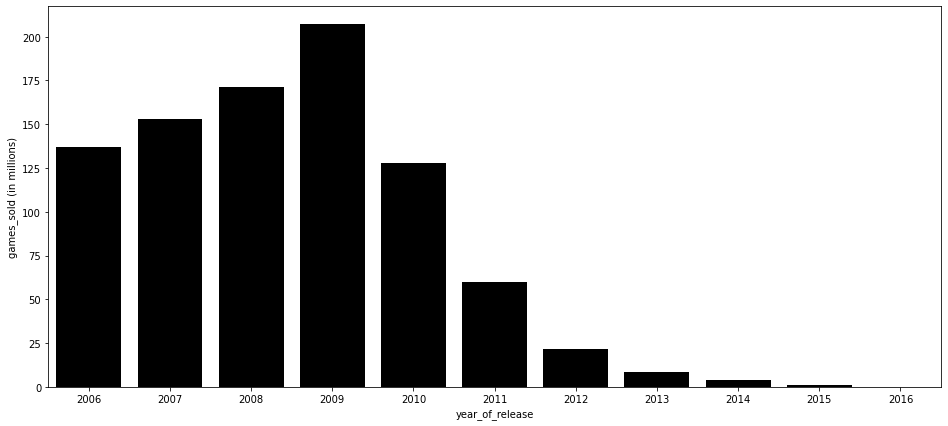

Данные для платформы DS


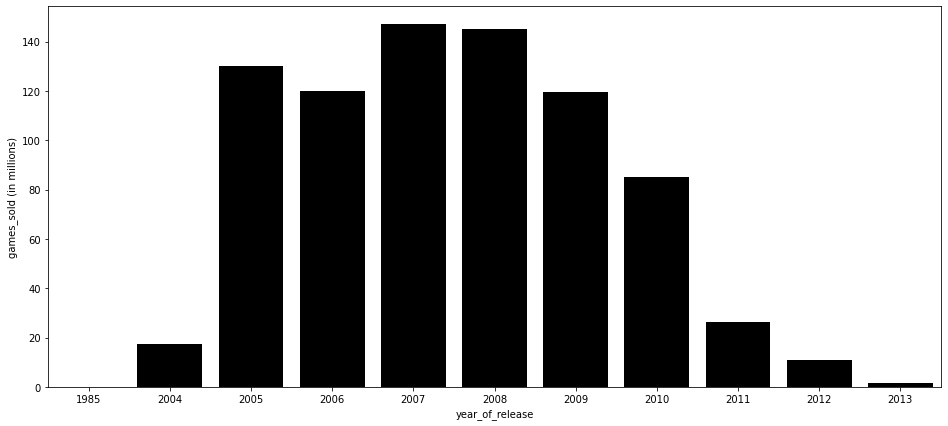

Данные для платформы PS


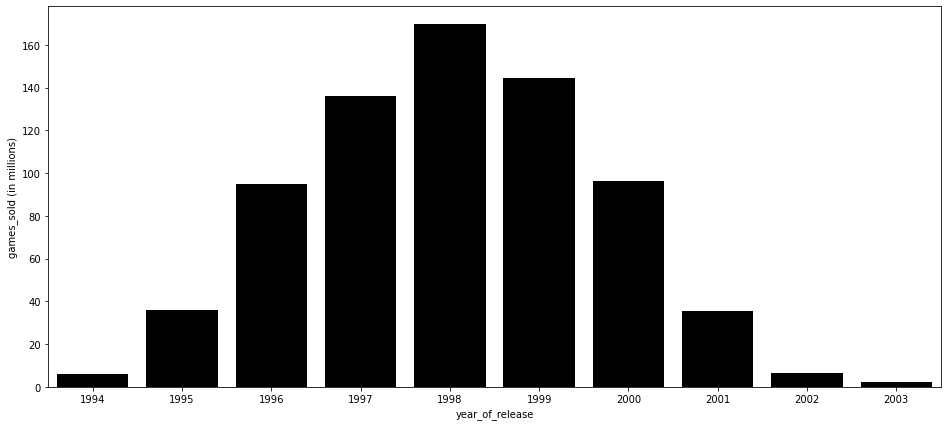

Данные для платформы PC


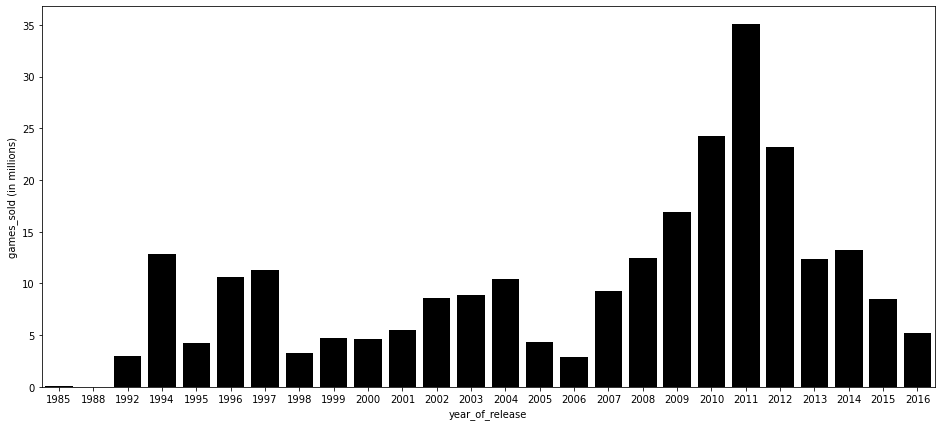

In [14]:
interested_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PC']

for platform in interested_platforms:
    platform_data = (data.query('platform == @platform')
                         .groupby(by='year_of_release')
                         .agg({'total_sales':'sum'}))
    print(f'Данные для платформы {platform}')
    plt.figure(figsize=(16,7))
    sns.barplot(data=platform_data, x=platform_data.index, y='total_sales', color='black')
    plt.ylabel('games_sold (in millions)')
    plt.show()

Как мы видим, везде (за исключением ошибки в графике для Nintendo DS) типичный срок жизни платформы составляет порядка 10 лет (от 9 до 11 на наших данных), причем половину этого срока количество выпускаемых игр растет, а далее начинает потихоньку падать, так как появляется следующее поколение платформ. 

Интересным исключением в данном случае является ПК рынок. Так как ПК являются модульными устройствами в отличие от остальных платформ, продажи на нем по большей части зависят от общего обьема проданных игр и не подвержены спаду в результате "смены поколений"

Интересующий нас момент - на какие платформы делать ставку в текущий момент. Для этого построим распределение для всех платформ и посмотрим, какие из них находятся максимально близко к середине своего жизненного цикла (то есть к пику по обьемам продаж)

Данные для платформы Wii


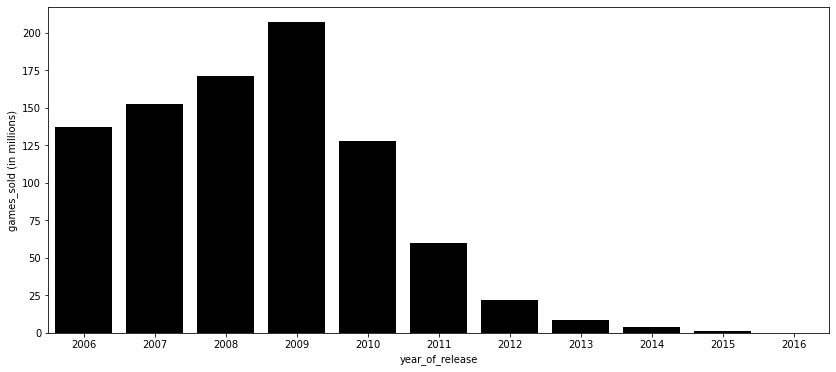

Данные для платформы NES


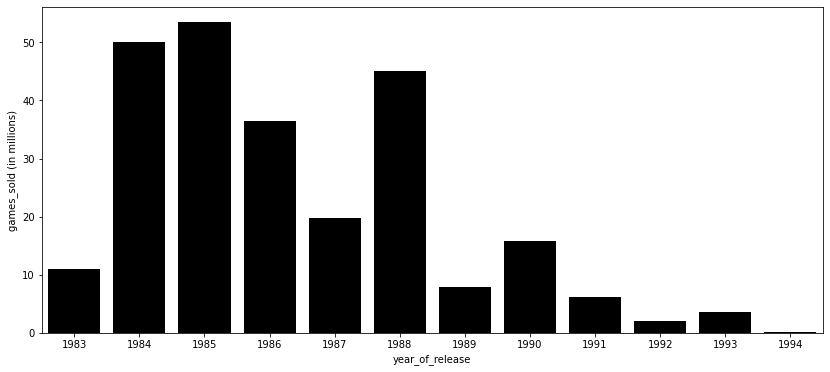

Данные для платформы GB


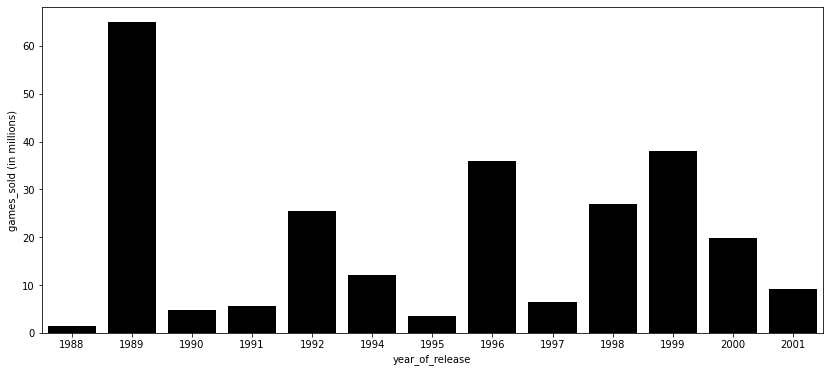

Данные для платформы DS


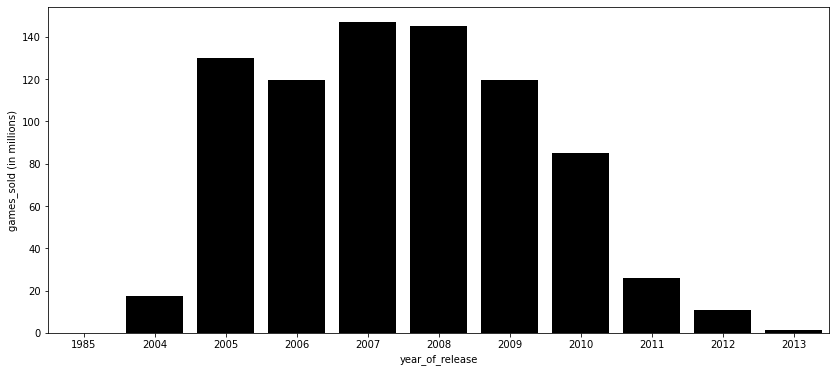

Данные для платформы X360


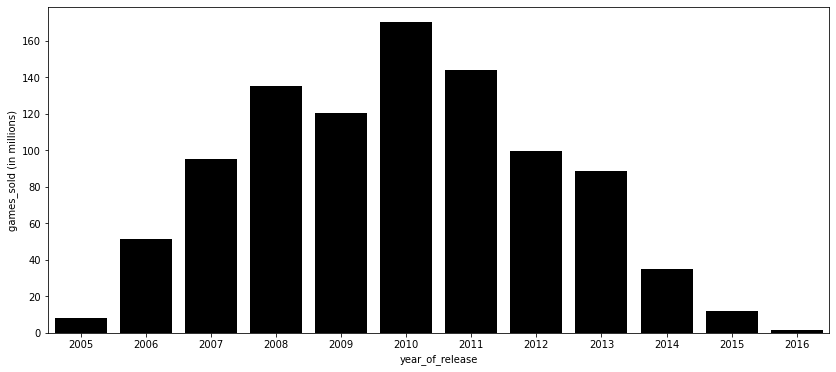

Данные для платформы PS3


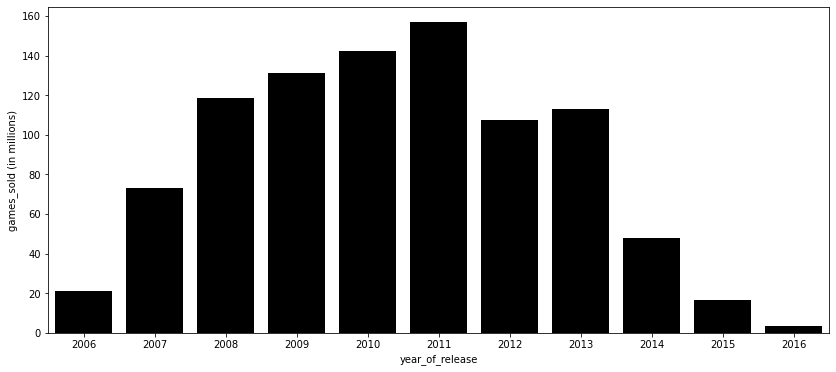

Данные для платформы PS2


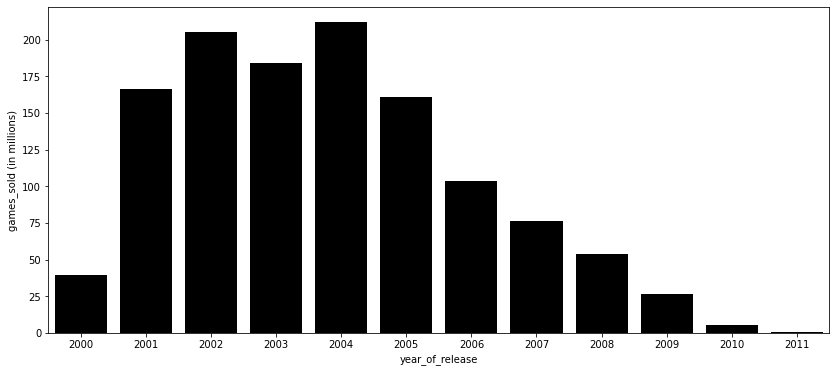

Данные для платформы SNES


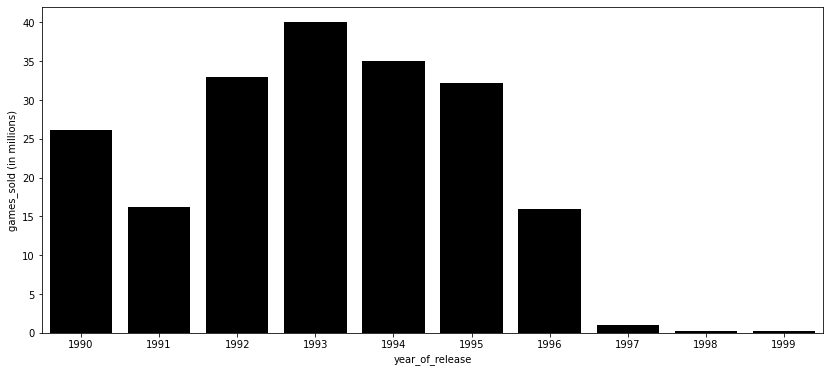

Данные для платформы GBA


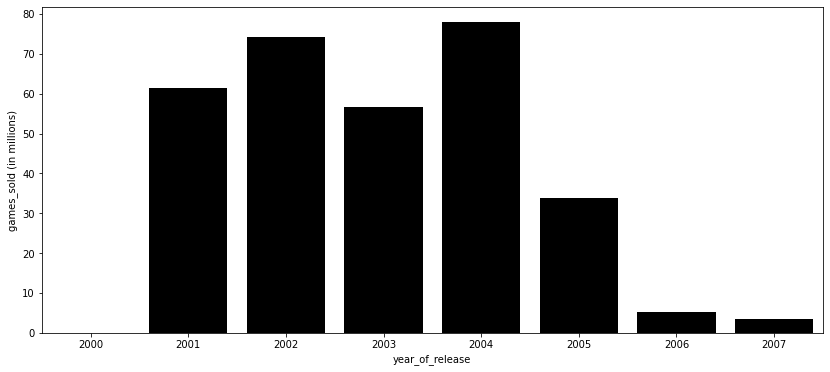

Данные для платформы PS4


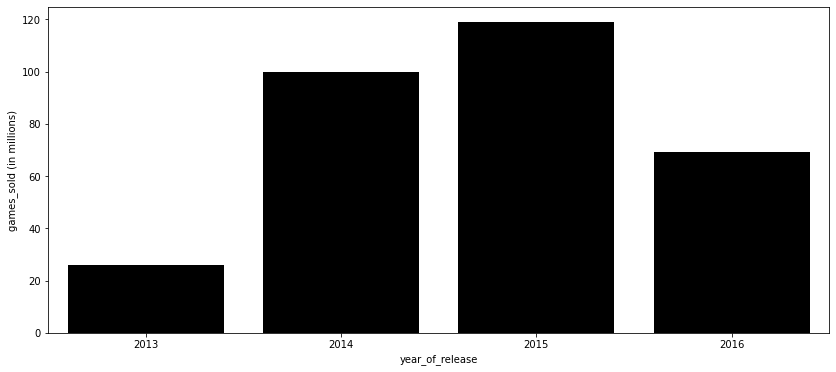

Данные для платформы 3DS


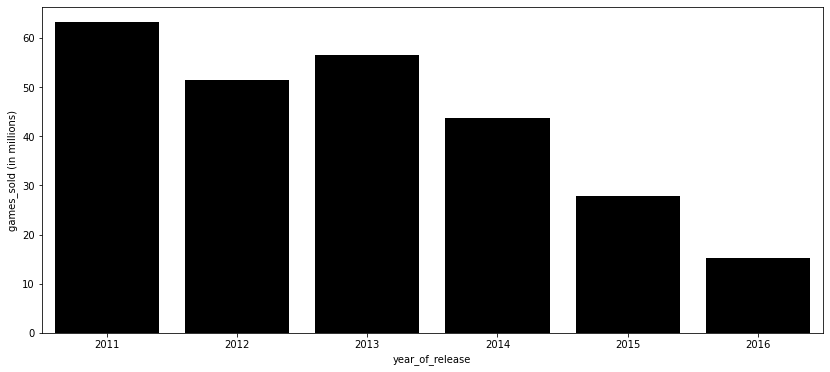

Данные для платформы N64


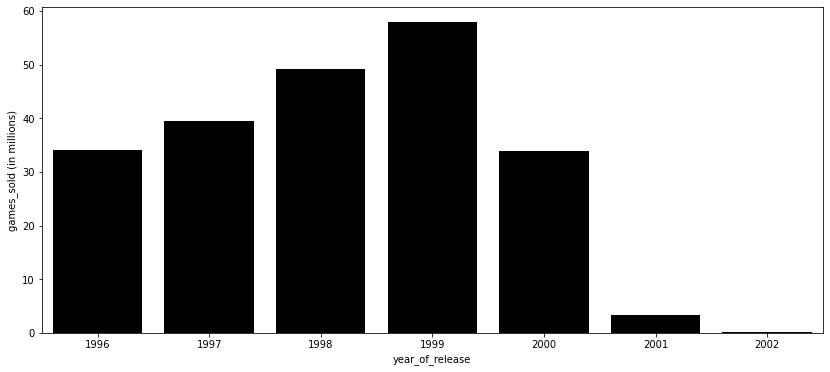

Данные для платформы PS


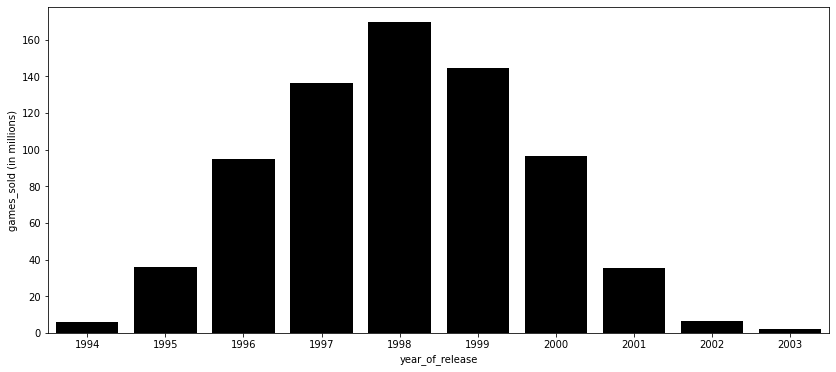

Данные для платформы XB


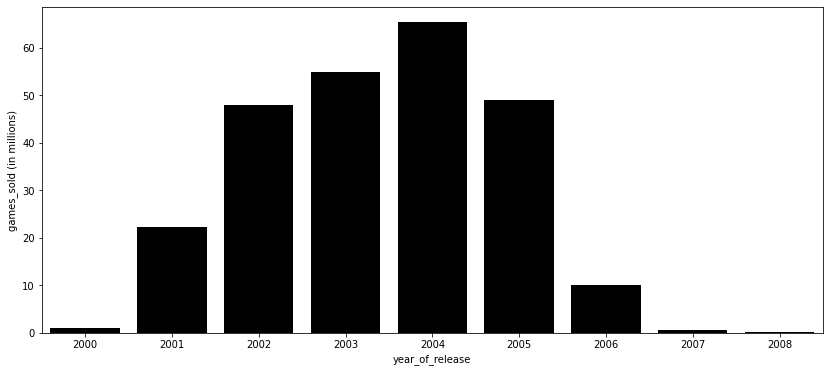

Данные для платформы PC


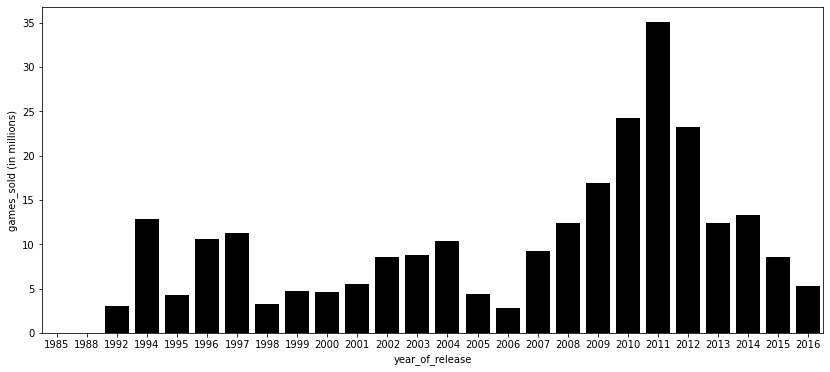

Данные для платформы 2600


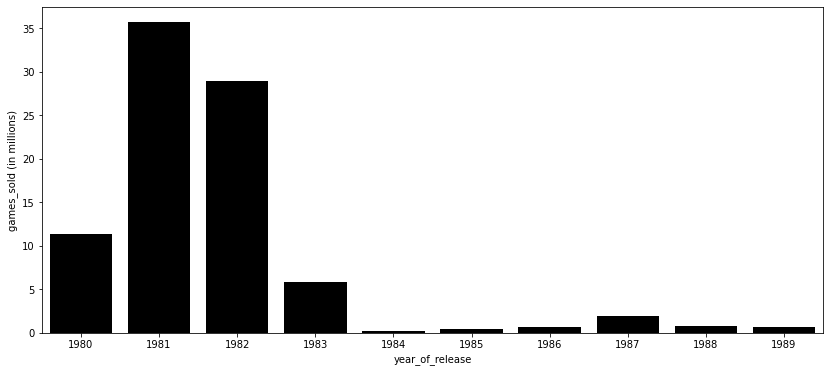

Данные для платформы PSP


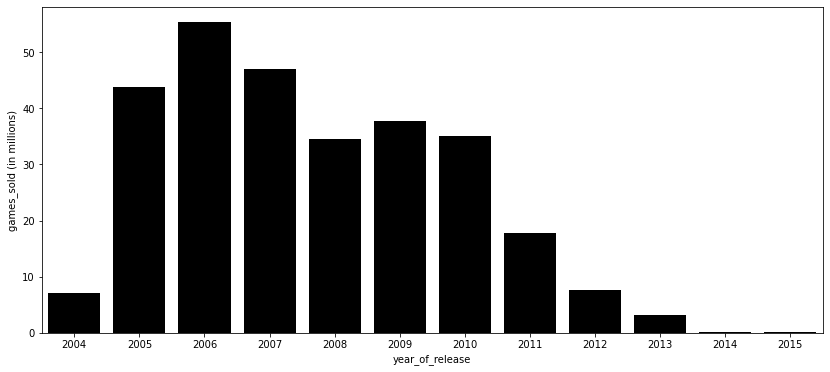

Данные для платформы XOne


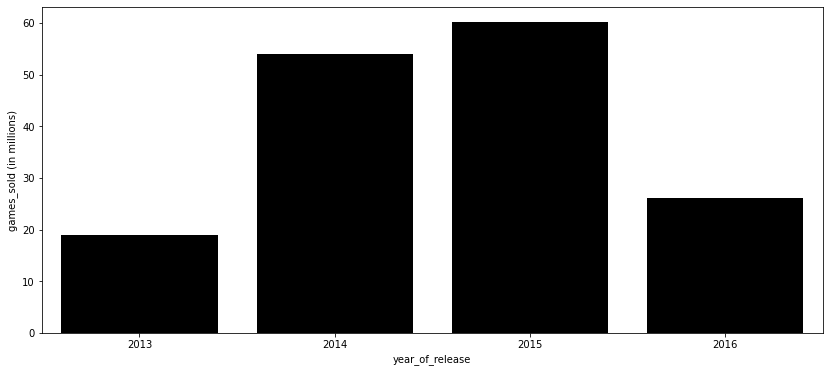

Данные для платформы WiiU


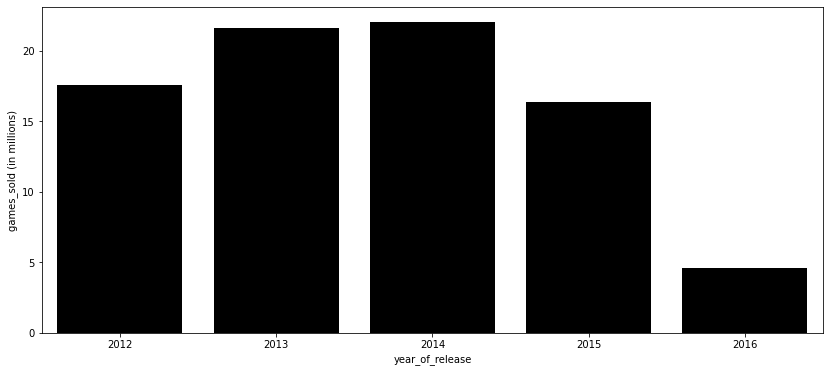

Данные для платформы GC


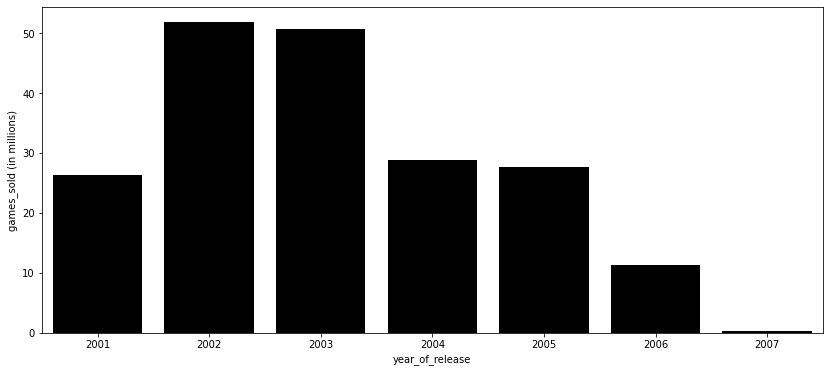

Данные для платформы GEN


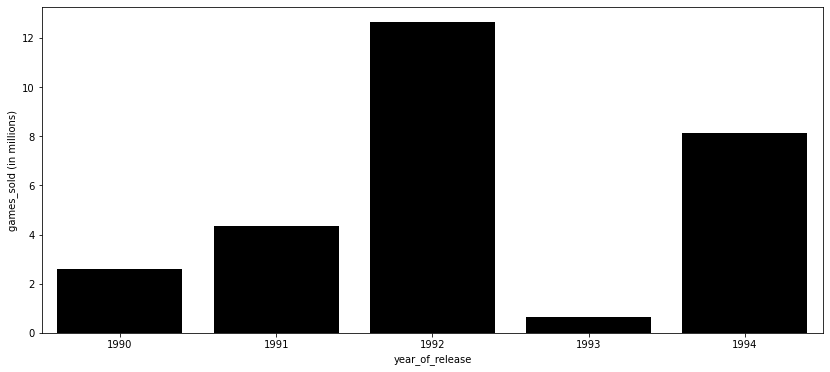

Данные для платформы DC


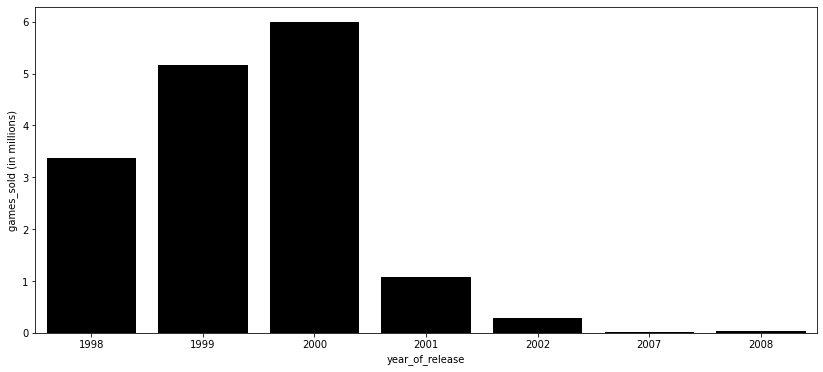

Данные для платформы PSV


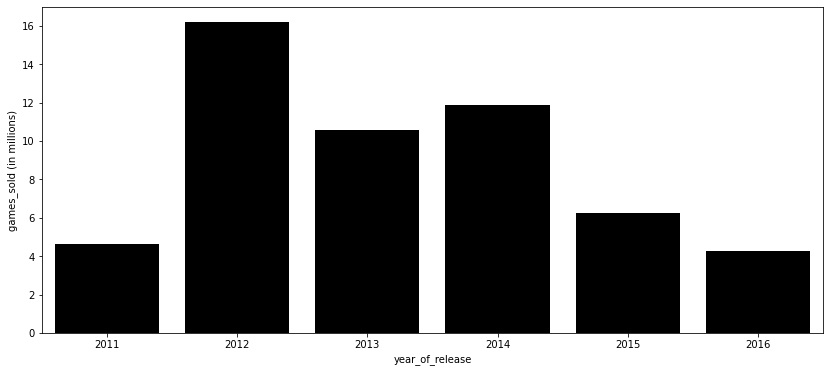

Данные для платформы SAT


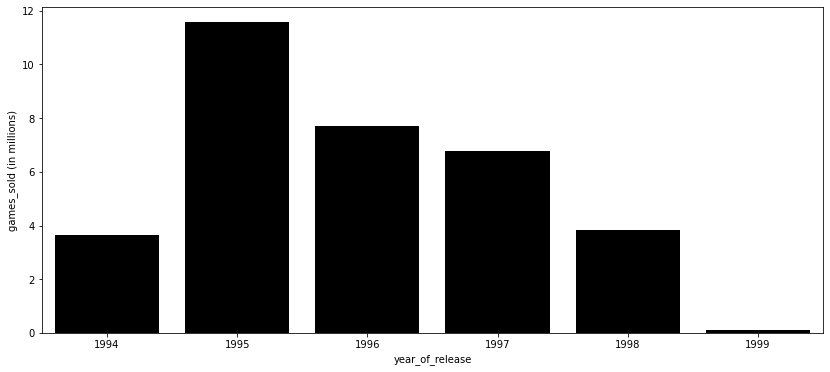

Данные для платформы SCD


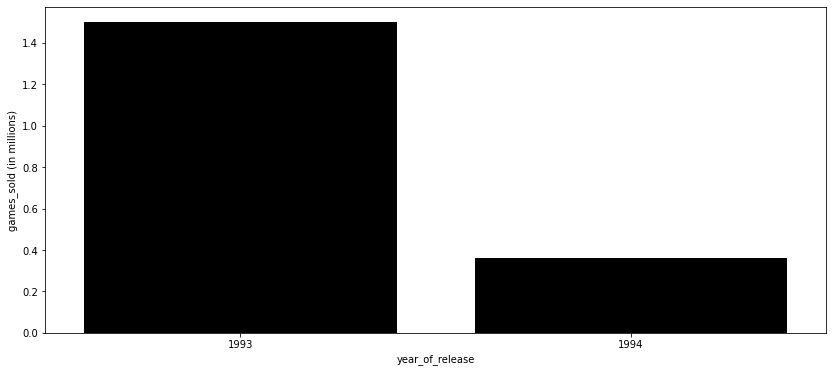

Данные для платформы WS


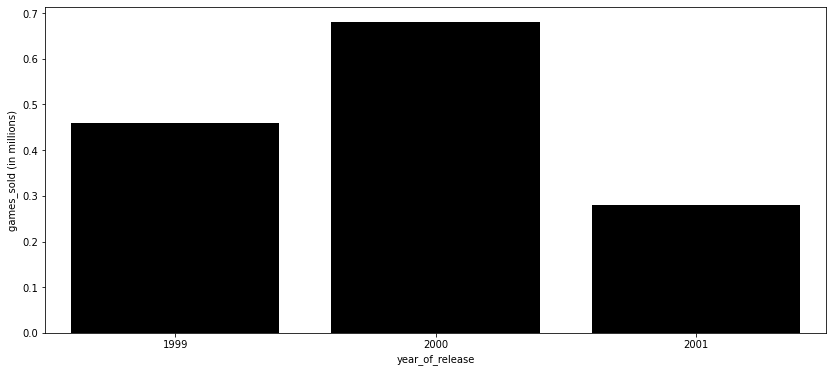

Данные для платформы NG


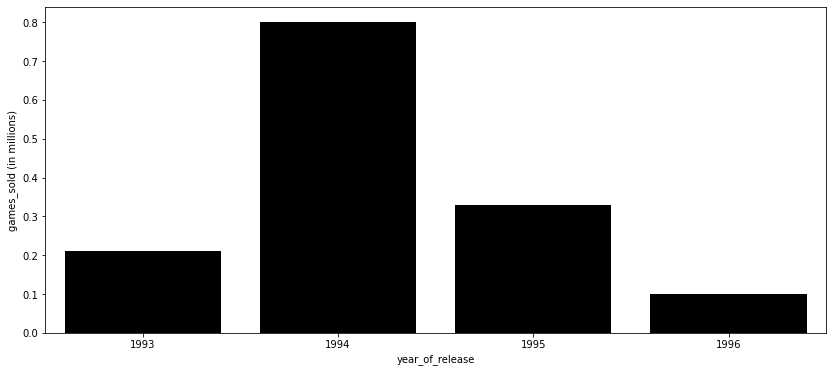

Данные для платформы TG16


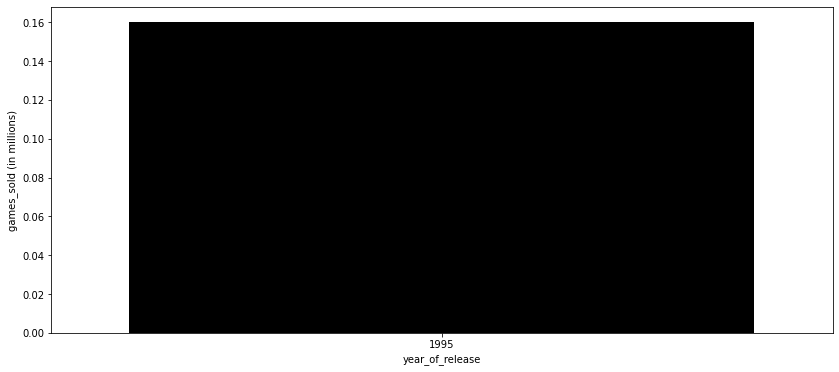

Данные для платформы 3DO


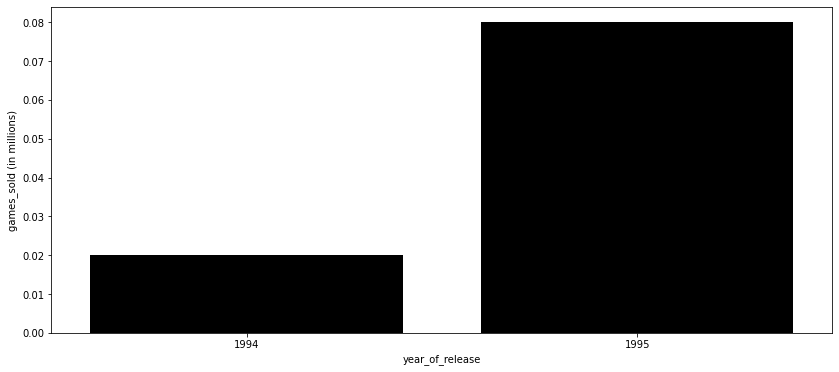

Данные для платформы GG


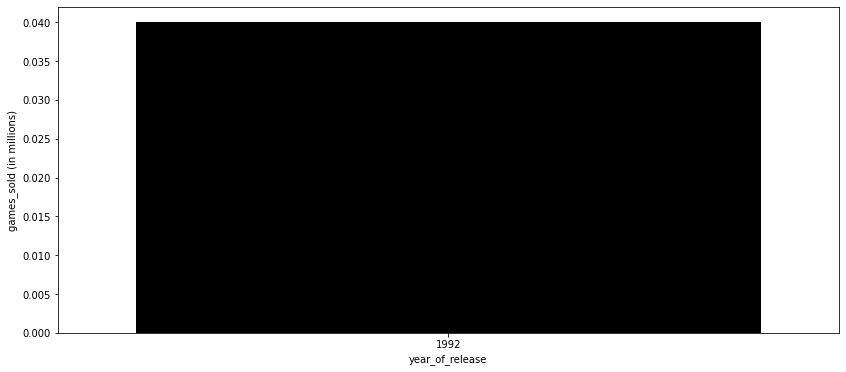

Данные для платформы PCFX


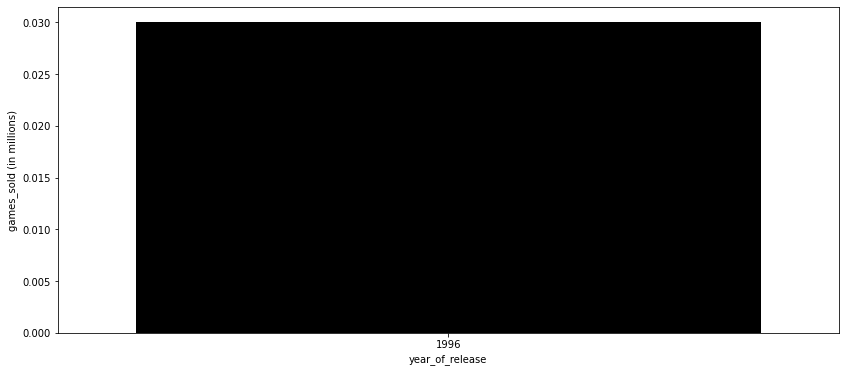

In [15]:
for platform in data['platform'].unique():
    platform_data = (data.query('platform == @platform')
                         .groupby(by='year_of_release')
                         .agg({'total_sales':'sum'}))
    print(f'Данные для платформы {platform}')
    plt.figure(figsize=(14,6))
    sns.barplot(data=platform_data, x=platform_data.index, y='total_sales', color='black')
    plt.ylabel('games_sold (in millions)')
    plt.show()

Из этого огромного количества графиков мы можем выделить несколько интересующих нас платформ - PS4, PC, Xbox One, PS3, Xbox 360 WiiU, PS Vita. Причем первые 3 (PS4, PC, XBOX One) представляют больший интерес, так как количество проданных игр для них выше, чем для следующих платформ.

Снова нарисуем графики продаж для интересующих нас платформ.

Данные для платформы PS4


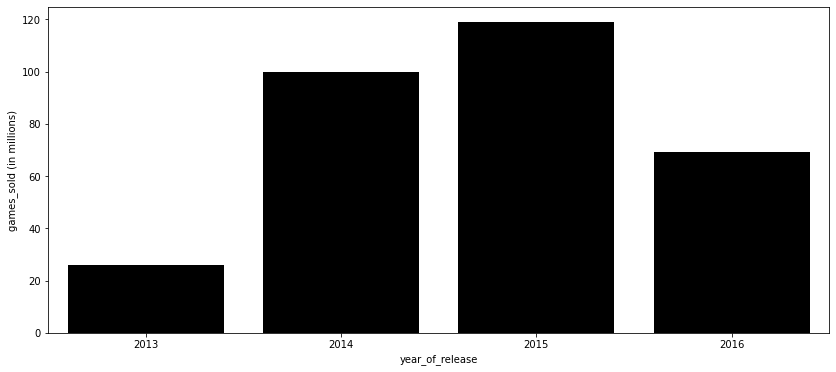

Данные для платформы PC


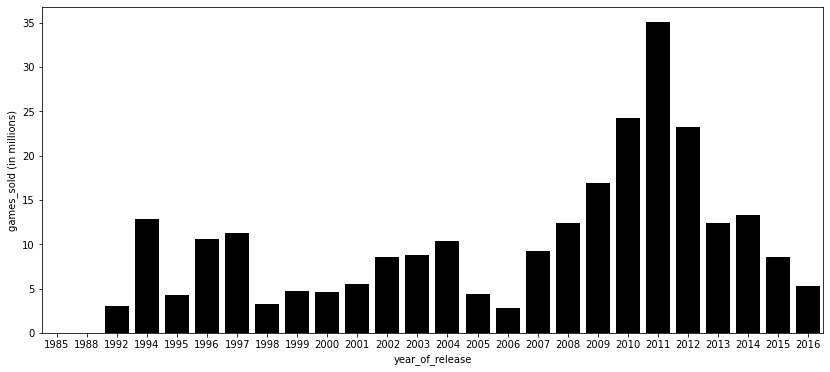

Данные для платформы XOne


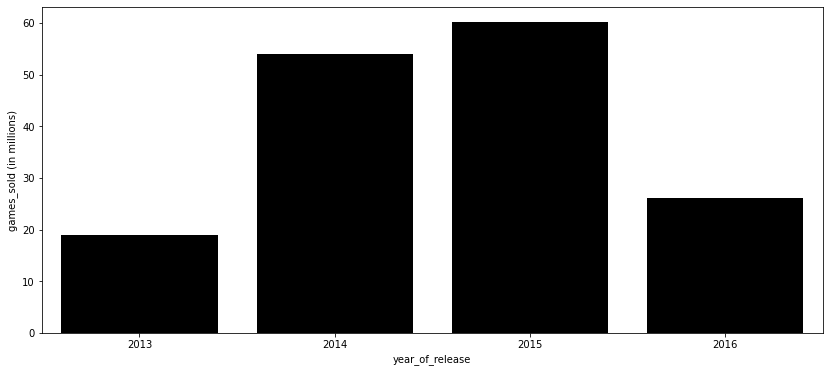

Данные для платформы PS3


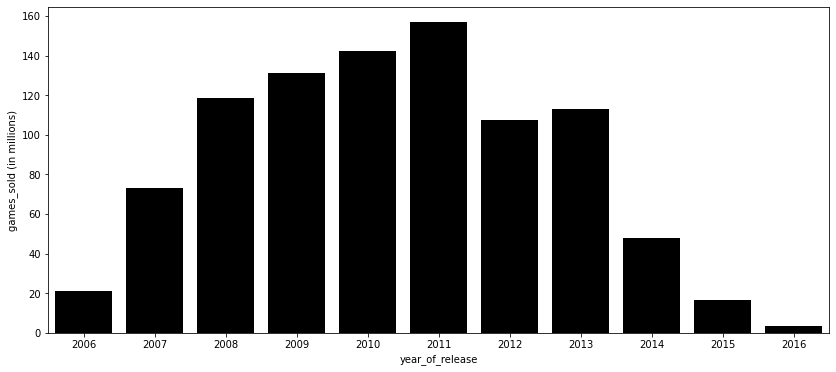

Данные для платформы X360


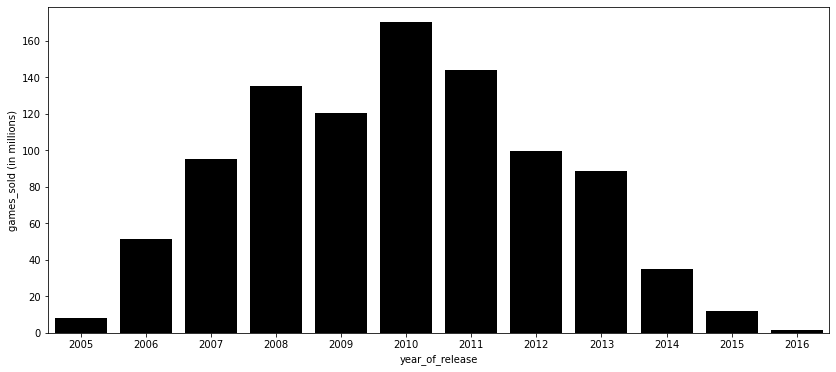

Данные для платформы WiiU


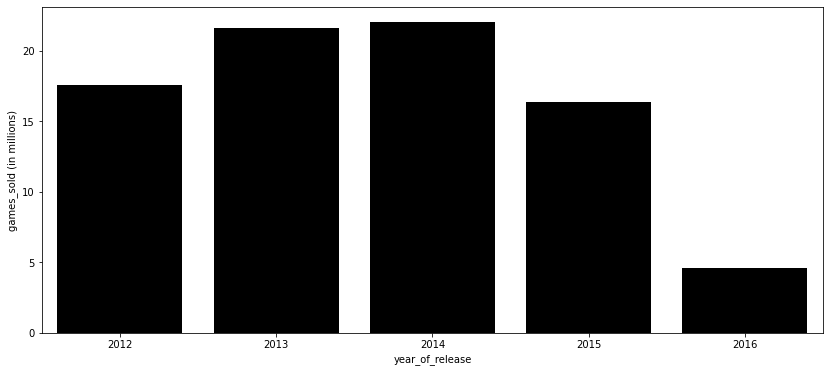

Данные для платформы PSV


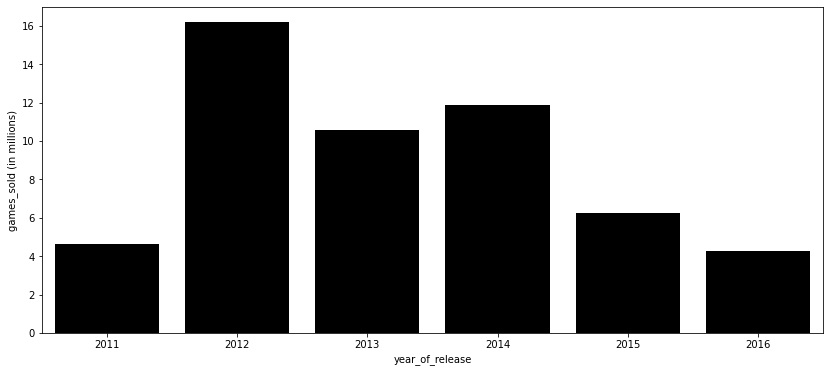

In [16]:
interesting_platforms = ['PS4', 'PC', 'XOne', 'PS3', 'X360', 'WiiU', 'PSV']

for platform in interesting_platforms:
    platform_data = (data.query('platform == @platform')
                         .groupby(by='year_of_release')
                         .agg({'total_sales':'sum'}))
    print(f'Данные для платформы {platform}')
    plt.figure(figsize=(14,6))
    sns.barplot(data=platform_data, x=platform_data.index, y='total_sales', color='black')
    plt.ylabel('games_sold (in millions)')
    plt.show()

Во всех графиках мы видим спад проданных копий в 2016 году. Это интересно, непонятно, чем вызван такой спад, моя гипотеза - данные за 2016 неполные.

Как мы видим, все наши платформы за исключением PC и PS Vita находятся как раз в середине своего жизненного цикла. PSV немного старше этих платформ и продажи у нее уже идут на спад, как и у платформ предыдущего поколения (PS3 и X360) поэтому делать на них ставку видится не самой лучшей идеей. PC же является исключением из жизненных циклов, поэтому к нему эти понятия не применимы.

Все наши платформы вышли в промежуток с 2011 по 2013 год (за исключением PC и консолей прошлого поколения), причем 2 из наиболее нас интересующих по продажам (PS4 и XBOX One) вышли в 2013 году. Таким образом, за актуальный промежуток следует взять период с 2013 года по 7 платформам - PS4, PC, XOne, PS3, X360, WiiU и PS Vita, делаю особую ставку на первые 3 платформы.

#### Вывод

Мы провели предварительный анализ рынка по годам и платформам. По результатам анализа было установлено, что за актуальный период следует взять данные с 2013 года для 7 наиболее перспективных платформ - PS4, PC, XOne, PS3, X360, WiiU и PS Vita. При этом наибольший интерес представляют первые 3 из представленных платформ.

### Ислледование актуального периода и платформ

Для начала создадим нашу рабочую таблицу за интересующий период и платформы.

In [17]:
analysis_data = data.query('year_of_release >= 2013 and platform in @interesting_platforms')
display(analysis_data.head(5))
analysis_data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Not NA,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1832 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1832 non-null   object 
 1   platform         1832 non-null   object 
 2   year_of_release  1832 non-null   int64  
 3   genre            1832 non-null   object 
 4   na_sales         1832 non-null   float64
 5   eu_sales         1832 non-null   float64
 6   jp_sales         1832 non-null   float64
 7   other_sales      1832 non-null   float64
 8   critic_score     919 non-null    float64
 9   user_score       1102 non-null   float64
 10  rating           1832 non-null   object 
 11  total_sales      1832 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 186.1+ KB


Итого у нас 1832 строки, в столбцах с оценками и рейтингом все еще есть пропуски.

Перейдем к анализу совокупных продаж по каждой интересующей платформе.

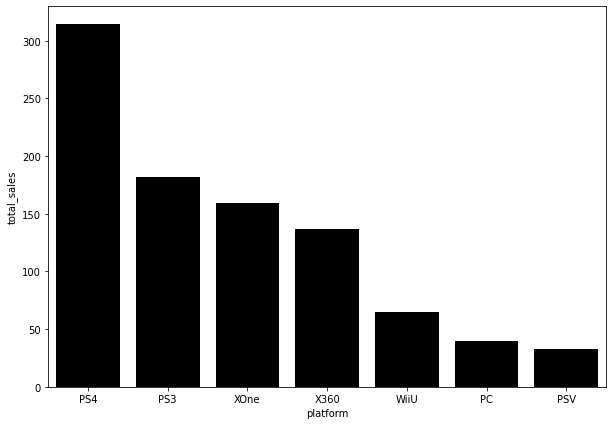

In [18]:
df = analysis_data.groupby('platform').agg({'total_sales':'sum'}).sort_values('total_sales', ascending=False)
plt.figure(figsize=(10,7))
sns.barplot(data=df, x=df.index, y='total_sales', color='black')
plt.show()

Как мы видим на графике, самой популярной платформой на данный момент является, с большим отрывом, PlayStation 4, за ней следует PS3, XOne и X360. Остальные платформы составляют пятую или меньше часть от лидера.

Теперь давайте построим диаграммы размаха для продаж различных игр на каждой платформе.

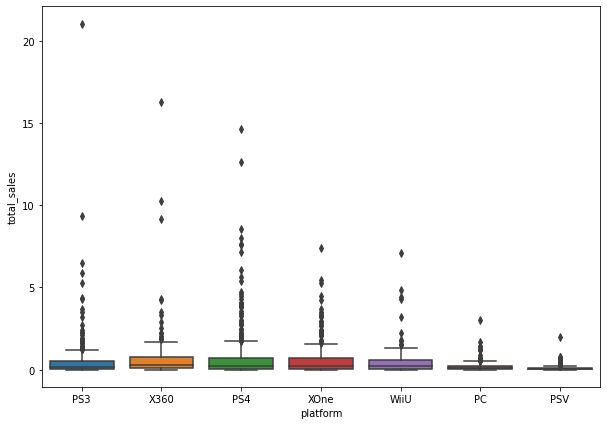

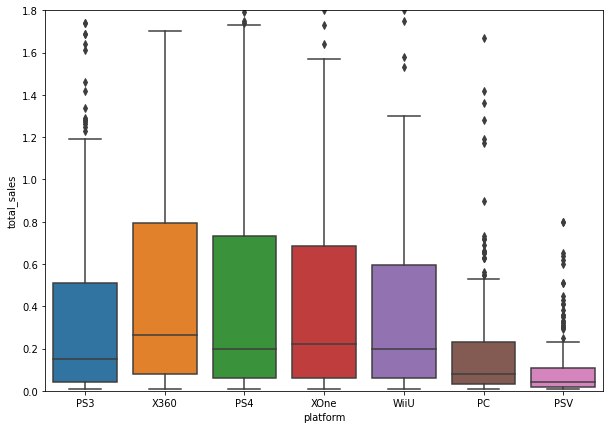

In [19]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(data=analysis_data, x='platform', y='total_sales')
plt.show()

fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(data=analysis_data, x='platform', y='total_sales')
ax.set_ylim([0, 1.8])
plt.show()

Как мы видим, разброс продаж по платформам достаточно значителен. Игры на PS4, XBOX One и X360 продаются схожими масштабами, далее идет WiiU и PS3, и замыкают ПК и PS Vita, где игры в среднем продаются значительно меньшими обьемами. Стоит отметить интересный факт - на Xbox 360 общие продажи меньше чем на PS3, но распределение средних продаж заметно выше. Из этого можно сделать вывод, что на X360 продаются лишь некоторые серии/жанры большими обьемами, при совокопных меньших продажах всех тайтлов.

Перейдем к оценке влияния отзывов критиков и игроков. Для этого построим для каждой платформы диаграммы рассеяния зависимости продаж от оценок критиков и игроков.

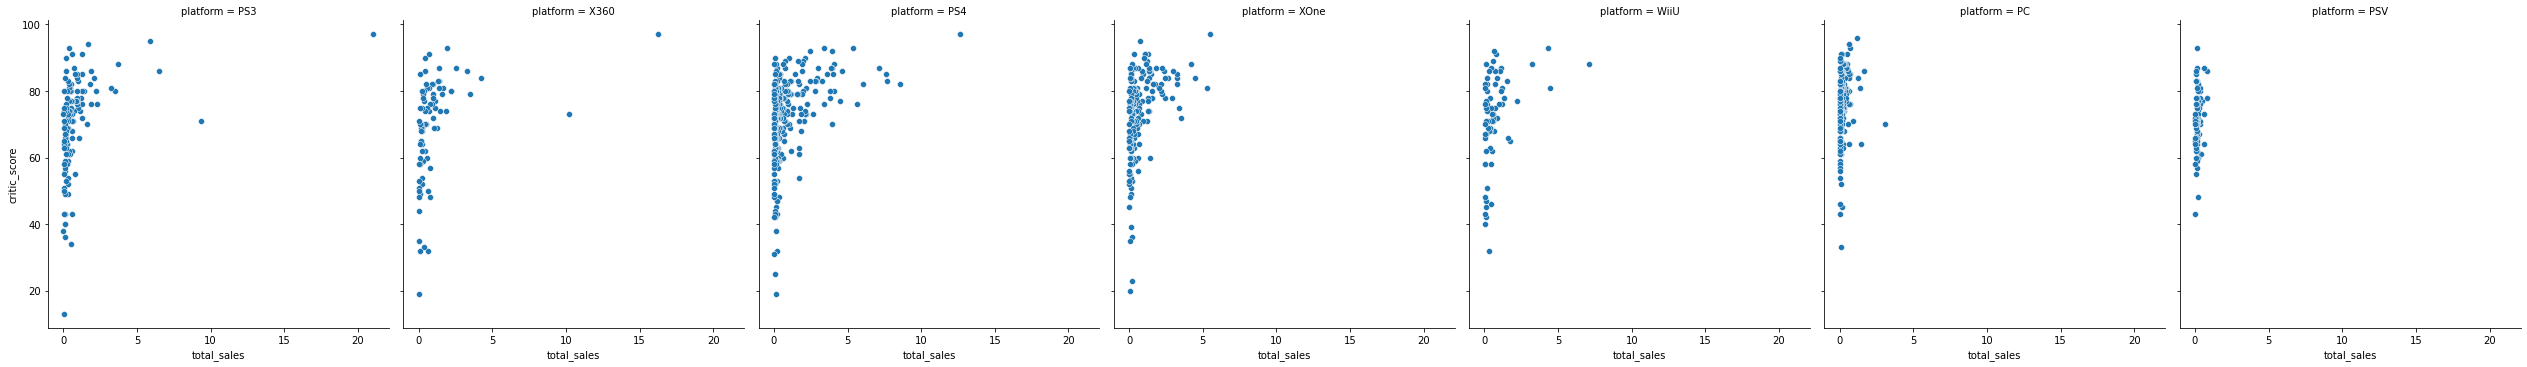

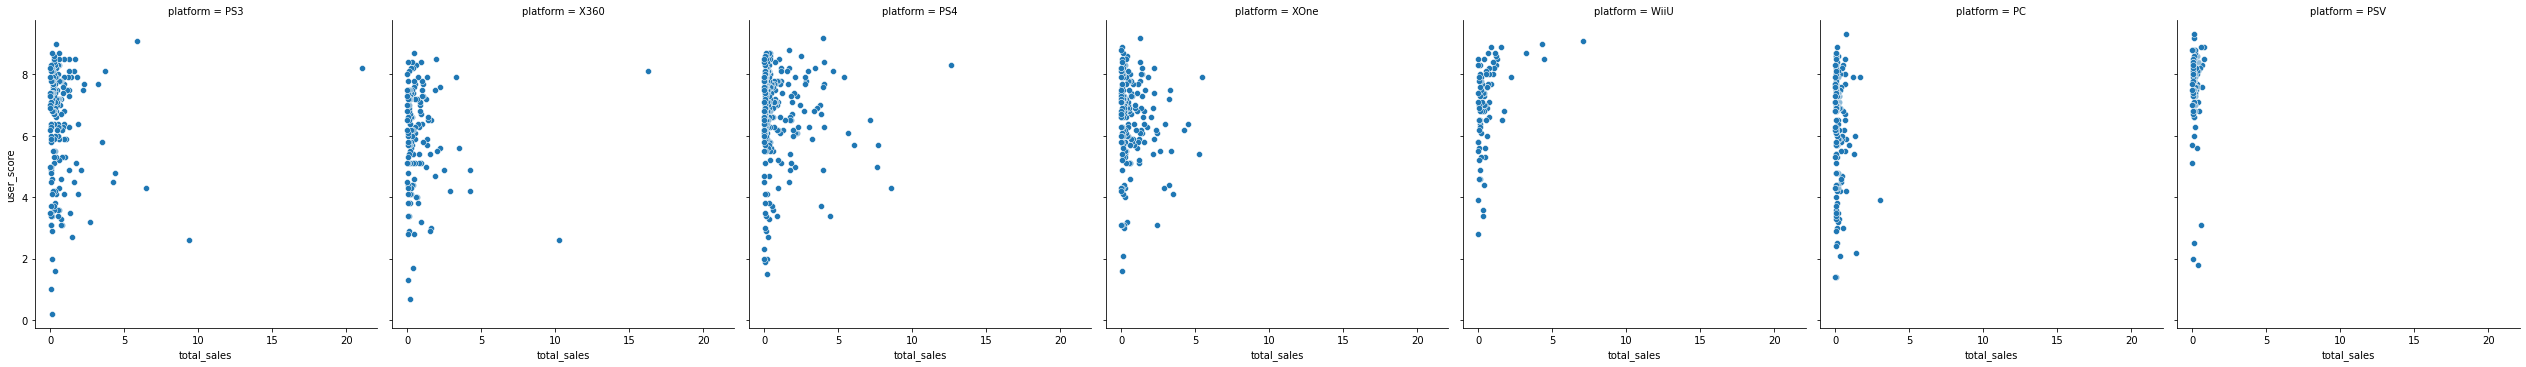

In [20]:
sns.relplot(kind='scatter', x='total_sales', y='critic_score', data=analysis_data, col='platform')
plt.show()

sns.relplot(kind='scatter', x='total_sales', y='user_score', data=analysis_data, col='platform')
plt.show()

Некоторая незначительная корреляция видна как на графиках для оценок критиков, так и для оценок игроков, но так как суммарные продажи крайне редко превышают даже 2 миллионов копий, основная часть точек сгруппирована по оси близкой к нулю продаж, что затрудняет чтение. Проверим корреляцию через таблицу корреляций.

Карта корреляций для платформы PS4


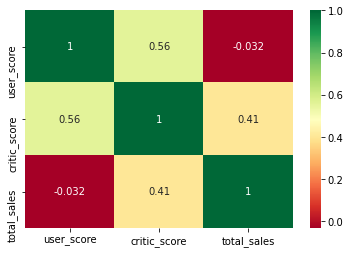

Карта корреляций для платформы PC


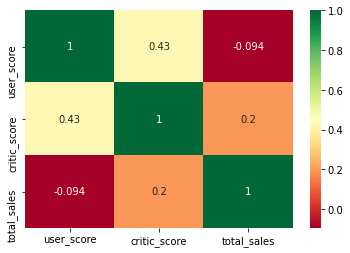

Карта корреляций для платформы XOne


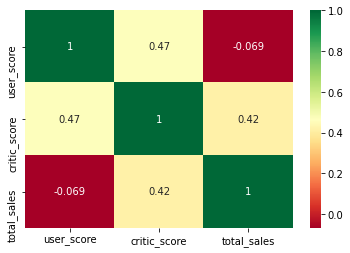

Карта корреляций для платформы PS3


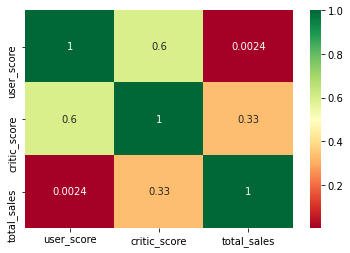

Карта корреляций для платформы X360


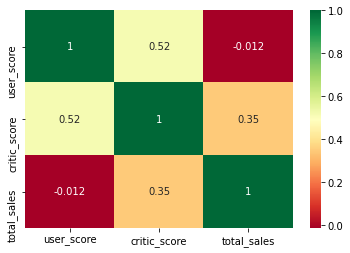

Карта корреляций для платформы WiiU


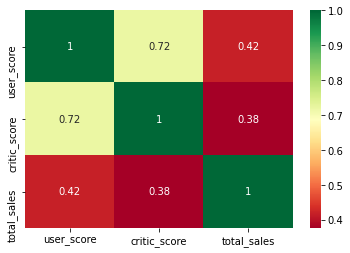

Карта корреляций для платформы PSV


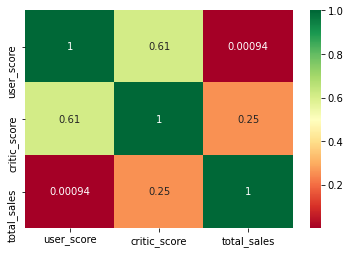

In [21]:
df = analysis_data[['platform', 'user_score', 'critic_score', 'total_sales']]

for platform in interesting_platforms:
    df1 = df.loc[df['platform'] == platform]
    print(f'Карта корреляций для платформы {platform}')
    sns.heatmap(data=df1.corr(), annot=True, cmap='RdYlGn')
    plt.show()

Как мы видим, значимой корреляции от оценок игроков обнаружено не было ни в одном из случаев, за ислючением WiiU, но даже там корреляция выражена слабо. Корреляция от оценок критиков заметна несколько сильнее чем от оценок игроков, но и в этом везде выражена слабо либо очень слабо.

#### Вывод

Мы изучили продажи на 5 самых актуальных платформах, зависимости продаж от оценок критиков и игроков. По результатам, мы можем удтверждать, что платформой с наибольшими продажами на данный момент является PS4, медианная игра продается там в районе 750к копий. Аналогичная ситуация наблюдается также на Xbox 360 и Xbox One. Стоит отдельно отметить PS3, где медианная игра продается не так значительно, но совокупные продажи больше, чем у платформ от Microsoft. Остальные платформы несколько менее популярны.

Значимой корреляции от оценок игроков обнаружено не было. Оценки критиков влияют несколько более значимо, но даже там коэффициент корреляции Пирсона не превышает порога в 0,5.

### Ислледование жанров

Построим столбчатую диаграмму, показывающую самые популярные жанры (по продажам).

In [22]:
df = analysis_data.query('genre == "Shooter"')['total_sales']
df

31       14.63
60       10.24
69        9.36
87        7.98
92        7.66
         ...  
15833     0.01
15841     0.02
16135     0.01
16217     0.01
16301     0.01
Name: total_sales, Length: 186, dtype: float64

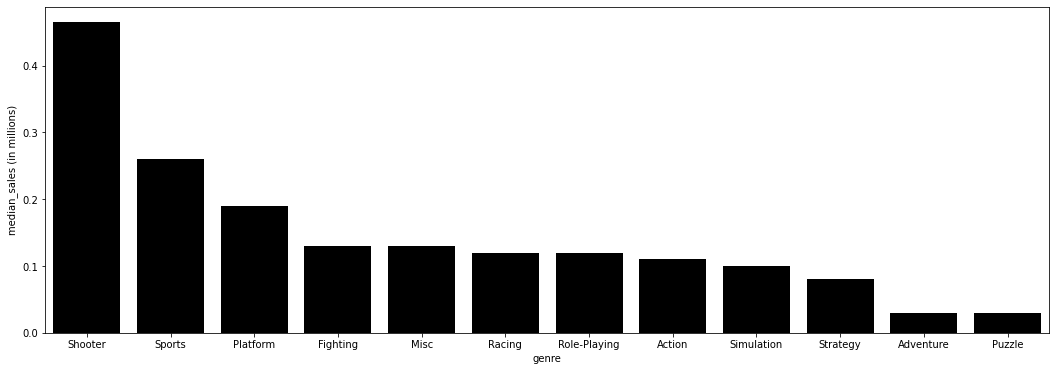

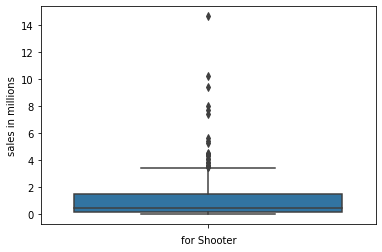

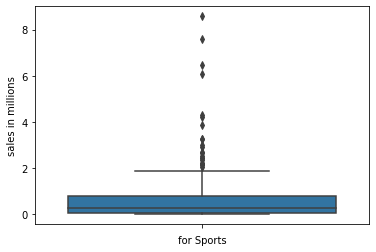

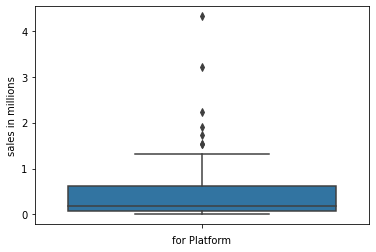

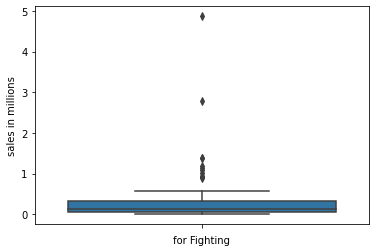

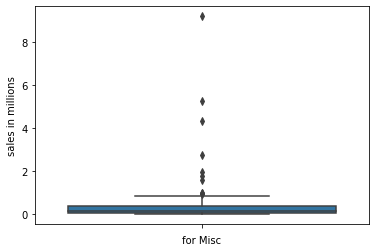

In [23]:
data_genres = analysis_data.groupby(by='genre').agg({'total_sales':np.median})
data_genres = data_genres.sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(18,6))
sns.barplot(data=data_genres, x=data_genres.index, y='total_sales', color='black')
plt.ylabel('median_sales (in millions)')
plt.show()

for genre in list(data_genres.index)[0:5]:
    df = analysis_data.query('genre == @genre')
    sns.boxplot(data=df, y='total_sales')
    plt.xlabel(f'for {genre}')
    plt.ylabel('sales in millions')
    plt.show()

А теперь посмотрим на популярность жанров по количеству выпущенных игр.

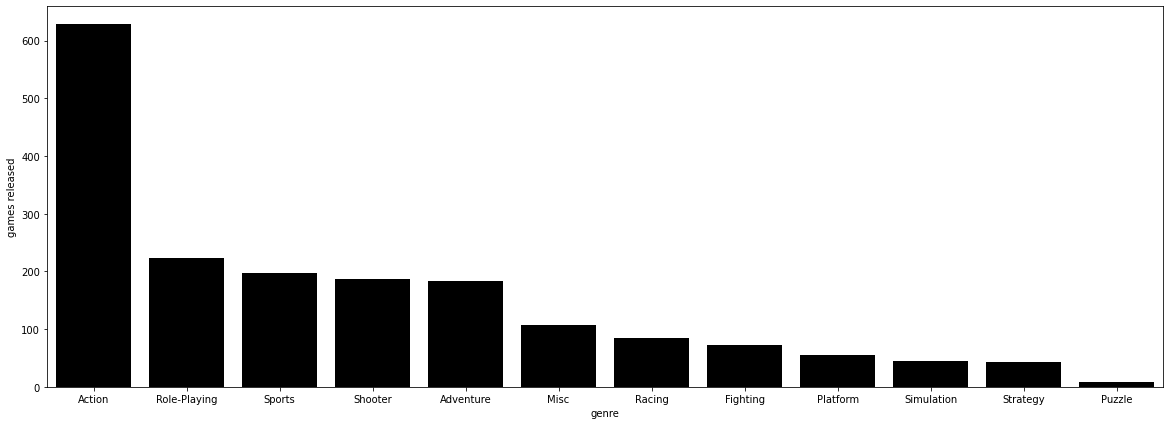

In [24]:
data_genres = analysis_data.groupby(by='genre').agg({'name':'count'})
data_genres = data_genres.sort_values(by='name', ascending=False)

plt.figure(figsize=(20,7))
sns.barplot(data=data_genres, x=data_genres.index, y='name', color='black')
plt.ylabel('games released')
plt.show()

#### Вывод

Как мы видим, шутеры с большим отрывом лидируют по медианным продажам, несмотря на небольшое количество выпущенных тайтлов. Этот жанр можно назвать одним из самых перспективных с точки зрения маркетинга. Экшн игры же наоборот, обладают самым большим количеством выпущенных игр, но по продажам значительно отстают от лидера. Этот жанр можно назвать одним из самых ненадежных. В топ жанров по медианным продажам также попали спортивные игры, платформеры, файтинги и миск игры.

### Исследование пользователей по регионам

Теперь составим рейтинги по наиболее популярным платформам и жанрам в зависимости от регионов. Начнем с платформ.

In [25]:
def make_cat_others(df, column):
    val = sum(df.iloc[5:][column])
    df = df.iloc[:5]
    df.loc['Others'] = val
    return df


df = analysis_data.groupby('platform').agg({'na_sales':'sum'}).sort_values('na_sales', ascending=False)
df1 = make_cat_others(df, 'na_sales')
df1

Y:\Anaconda\envs\da_practicum_env\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
WiiU,29.21
Others,16.15


Данные по платформам для региона na


Y:\Anaconda\envs\da_practicum_env\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


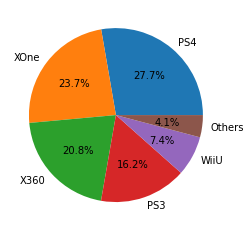

Данные по платформам для региона eu


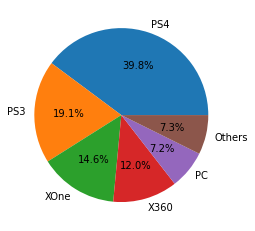

Данные по платформам для региона jp


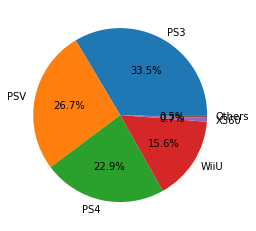

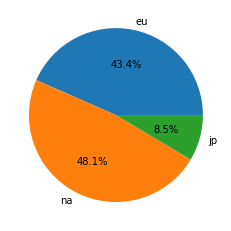

In [26]:
def make_cat_others(df, column):      # Функция для создания категории другие
    val = sum(df.iloc[5:][column])
    df = df.iloc[:5]
    df.loc['Others'] = val
    return df

regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    df = analysis_data.groupby('platform').agg({region:'sum'}).sort_values(region, ascending=False)
    df1 = make_cat_others(df, region)
    print('Данные по платформам для региона', region.split('_')[0])
    plt.pie(x=df1[region], labels=df1.index, autopct='%1.1f%%')
    plt.show()

df = pd.DataFrame(data={'eu':[analysis_data['eu_sales'].sum()],
                        'na':[analysis_data['na_sales'].sum()],
                        'jp':[analysis_data['jp_sales'].sum()]})

plt.pie(x=df.loc[0], labels=df.columns, autopct='%1.1f%%')
plt.show()

Как мы видим по анализу платформ, PS4 лидирует в Европе и Америке, занимает второе место в Японии. В Америке при этом достаточно сильны позиции XBOX One, а в Японии - PS Vita (является лидером) и Nintendo WiiU. Относительно обьемов рынков - Америка и Европа делят рынок приблизительно попалам, Япония же занимает оставшиеся 8%.

Перейдем к анализу по жанрам.

In [27]:
analysis_data.groupby('genre').agg({'jp_sales':'sum'}).sort_values(region, ascending=False)

,jp_sales
genre,
Action,22.56
Role-Playing,16.24
Shooter,6.61
Misc,5.17
Fighting,4.71
Sports,4.10
Adventure,3.16
Platform,2.98
Racing,2.30


Данные по жанрам для региона na


Y:\Anaconda\envs\da_practicum_env\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


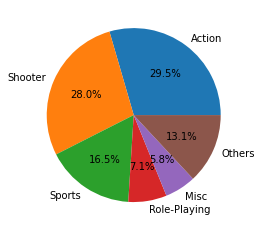

Данные по жанрам для региона eu


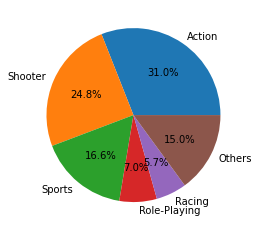

Данные по жанрам для региона jp


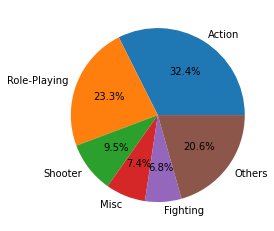

In [28]:
for region in regions:
    df = analysis_data.groupby('genre').agg({region:'sum'}).sort_values(region, ascending=False)
    df1 = make_cat_others(df, region)
    print('Данные по жанрам для региона', region.split('_')[0])
    plt.pie(x=df1[region], labels=df1.index, autopct='%1.1f%%')
    plt.show()

Как мы видим, жанровые предпочтения в Европе и Америке очень похожи (за исключением лидера и незначительных перестановок в хвосте диаграммы). А вот в Японии предпочтения значительно отличаются: лидер все так же экшн игры, но значительно большей популярностью пользуются РПГ и файтинги.

Перейдем к оценке влияния рейтинга.

Данные по продажам в зависимости от рейтинга для региона na


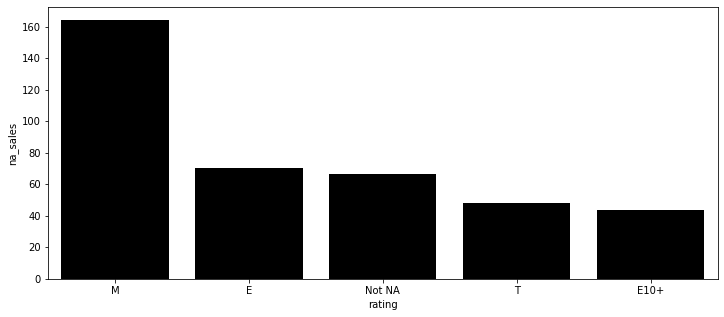

Данные по продажам в зависимости от рейтинга для региона eu


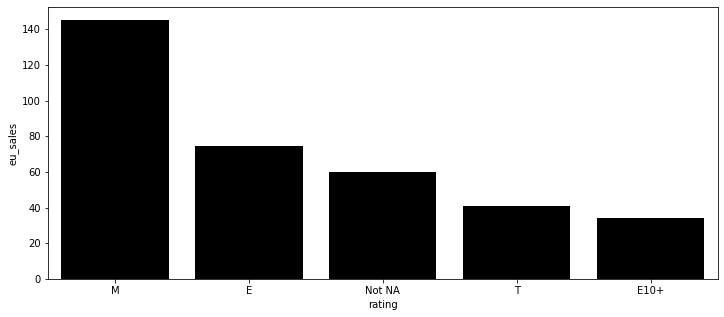

Данные по продажам в зависимости от рейтинга для региона jp


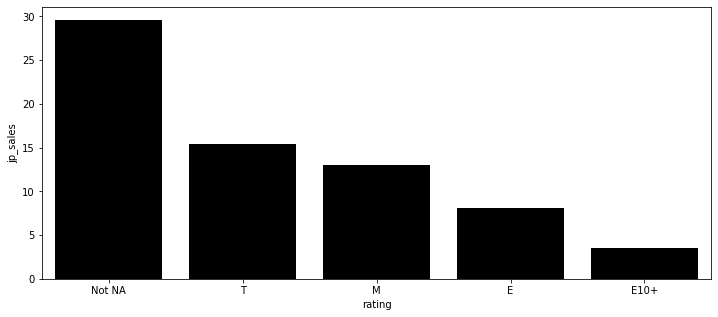

In [29]:
for region in regions:
    df = analysis_data.groupby('rating').agg({region:'sum'}).sort_values(region, ascending=False)
    print('Данные по продажам в зависимости от рейтинга для региона', region.split('_')[0])
    plt.figure(figsize=(12,5))
    sns.barplot(data=df, x=df.index, y=region, color='black')
    plt.show()

Мы видим следующую ситуацию - в Европе и Америке наблюдается абсолютно схожее поведение (популярностью пользуются игры рейтинга M - 18+, дальнейшее распределение рейтингов одинаково), в отличие от Японии - там больше предпочитают игры без рейтинга от ESRB, то есть игры не рассчитанные на западный рынок.

#### Вывод

Северная Америка и Европа в значительной степени схожи, как по предпочитаемым платформам (за исключением сильных позиций XBOX One в Америке), так и по предпочитаемым жанрам. Иная ситуация наблюдается в Японии - там имеются региональные предпочтения как по платформам (PS Vita, Nintendo WiiU), так и по жанрам (РПГ, misc).

Аналогичная ситуация наблюдается и для рейтинга - в Европе и Америке предпочитают 18+ игры, в то время как в Японии - игры, подходящее для более младшей аудитории.

## Проверка гипотез

Перед нами стоит задача проверить 2 гипотезы:

1) cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

2) cредние пользовательские рейтинги жанров Action и Sports разные.

Начнем с первой гипотезы.

H0: cредние пользовательские рейтинги платформ Xbox One и PC равны

H1: cредние пользовательские рейтинги платформ Xbox One и PC не равны

In [30]:
XOne_score = analysis_data.loc[analysis_data['platform'] == 'XOne', 'user_score']    # Создаем список ненулевых оценок XOne 
XOne_score = XOne_score[XOne_score.isnull() == False]                                

PC_score = analysis_data.loc[analysis_data['platform'] == 'PC', 'user_score']        # Создаем список ненулевых оценок PC
PC_score = PC_score[PC_score.isnull() == False]

stats.ttest_ind(XOne_score, PC_score, equal_var=False)                               # Проверяем гипотезу

Ttest_indResult(statistic=1.45192815744488, pvalue=0.14759594013430463)

Как мы видим значение probability value получилось очень высоким, поэтому при любом адекватном уровне значимости нулевая гипотеза отвергаться не будет. Итог - cредние пользовательские рейтинги платформ Xbox One и PC равны.

Перейдем к проверке второй гипотезы

H0: cредние пользовательские рейтинги жанров Action и Sports равны.

H1: cредние пользовательские рейтинги жанров Action и Sports не равны.

In [31]:
action_score = analysis_data.loc[analysis_data['genre'] == 'Action', 'user_score']    # Создаем список ненулевых оценок Action 
action_score = action_score[action_score.isnull() == False]                                

sports_score = analysis_data.loc[analysis_data['genre'] == 'Sports', 'user_score']    # Создаем список ненулевых оценок Sports
sports_score = sports_score[sports_score.isnull() == False]

stats.ttest_ind(action_score, sports_score, equal_var=False)                          # Проверяем гипотезу

Ttest_indResult(statistic=10.050643117408523, pvalue=6.699812006833381e-20)

А здесь значение pvalue получилось наоборот - крайне низким, поэтому, опять же, при любом адекватном уровне значимости нулевая гипотеза будет отвергнута. Итог - cредние пользовательские рейтинги жанров Action и Sports не равны.

### Вывод

Мы проверили 2 гипотезы - о равенстве пользовательских оценок на ПК и Xbox One и о равенстве пользовательских оценок жанров экшн и спорт. По результатам проверки, у нас нет оснований предполагать, что оценки на ПК и Xbox One отличаются, но есть статистически значимые основания предполагать, что оценки экшнов и спортивных игр отличаются

## Общий вывод

Был получен датасет на 16715 строк. Мы провели предобработку данных, провели первичный анализ платформ и выпущенных игр по годам, по результатам которого установили актуальные данные - 7 платформ и временной период с 2013 года.

В рамках актуального периода были выявлены самые популярные платформы и жанры, изучены продажи, зависимости продаж от оценок. Был составлен "портрет" каждого из регионов, ислледованы платформы и жанры для каждого из них.

Также были проверены 2 требуемых гипотезы - о равенстве оценок пользователей на Xbox One и ПК и о равенстве оценок пользователей в жанрах Action и Sports.

Итого в Америке и Европе следует акцентировать внимание на 2х самых популярных платформах - PS4 и XOne, причем на игры в жанрах шутера, экшна и спортивных. В Японии же консоли от Microsoft можно не брать в расчет совсем, и делать основной упор только на PS4 и WiiU в жанрах action и RPG.